In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import binom, norm

In [2]:
def single_ball_path(levels):
    row, col = 0, 0
    path = [(row, col)]
    rng = np.random.default_rng()

    for _ in range(levels):
        random_probability = rng.random()
        if (random_probability < 0.5):
            row += 1    # move left
        else:
            col += 1    # move right
        path.append((row, col))

    return path

In [3]:
def experiment(n, N):
    end_positions = []
    for _ in range(N):
        path = single_ball_path(n)
        _, col = path[-1]   # Number of times it moved right
        end_positions.append(col)
    return end_positions

## **Experiment 1**

In [4]:
n = 10
num_trials = 20
for i in range(num_trials):
    print(f"The path for the {i} ball is: {single_ball_path(n)}")

The path for the 0 ball is: [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (2, 6), (3, 6), (3, 7)]
The path for the 1 ball is: [(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (3, 4), (4, 4), (5, 4), (6, 4)]
The path for the 2 ball is: [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (4, 2), (4, 3), (4, 4), (5, 4), (6, 4)]
The path for the 3 ball is: [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (5, 4), (5, 5)]
The path for the 4 ball is: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (5, 3), (6, 3), (7, 3)]
The path for the 5 ball is: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4), (5, 4), (5, 5)]
The path for the 6 ball is: [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (2, 5), (2, 6), (3, 6), (4, 6)]
The path for the 7 ball is: [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2)]
The path for the 8 ball is: [(0, 0), (1, 0), (2, 0), (3, 0), (4,

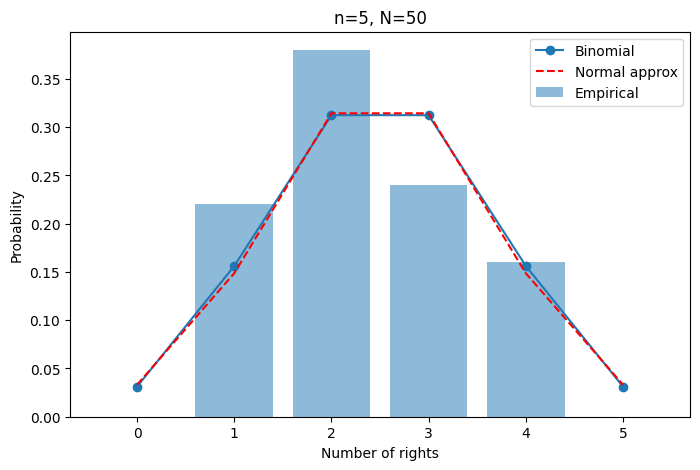

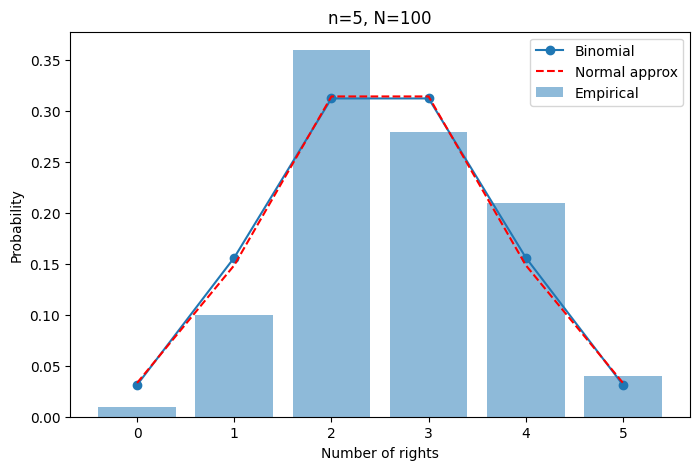

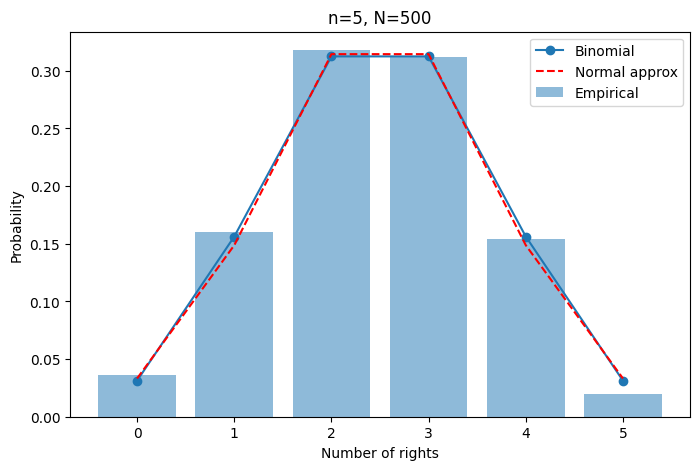

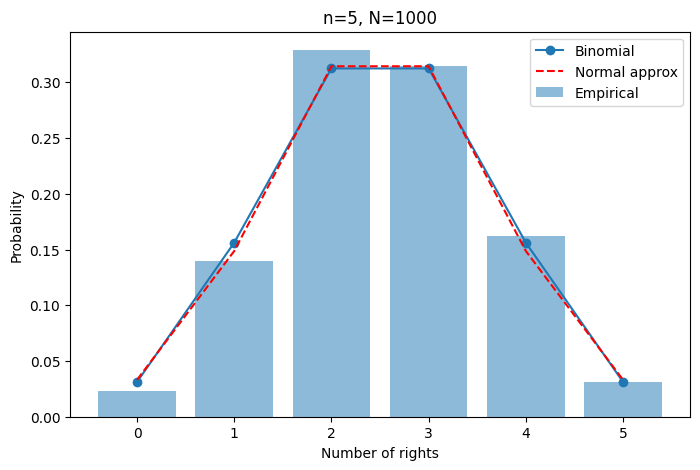

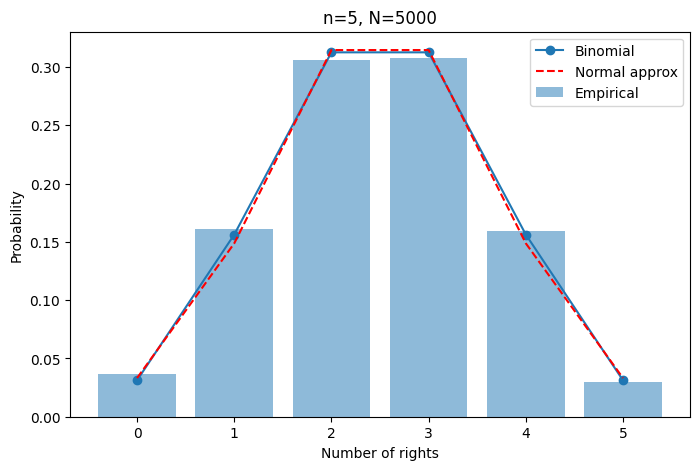

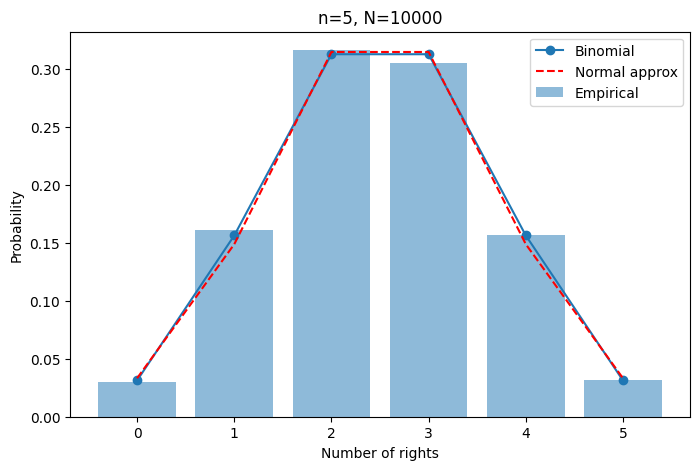

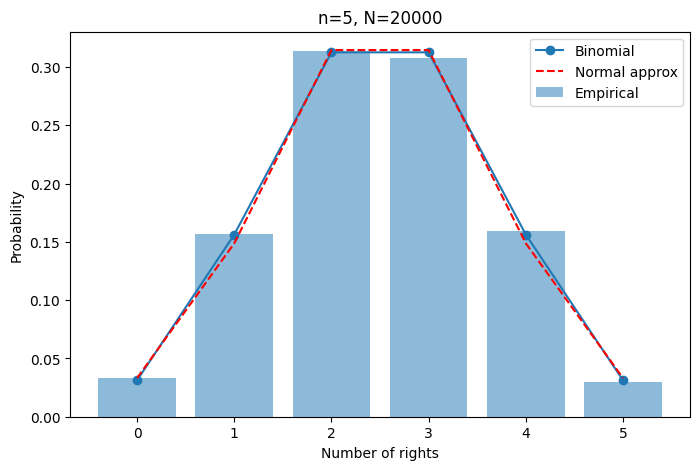

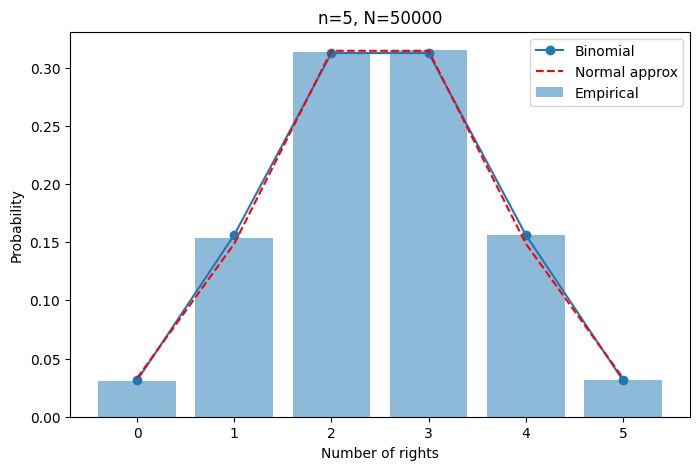

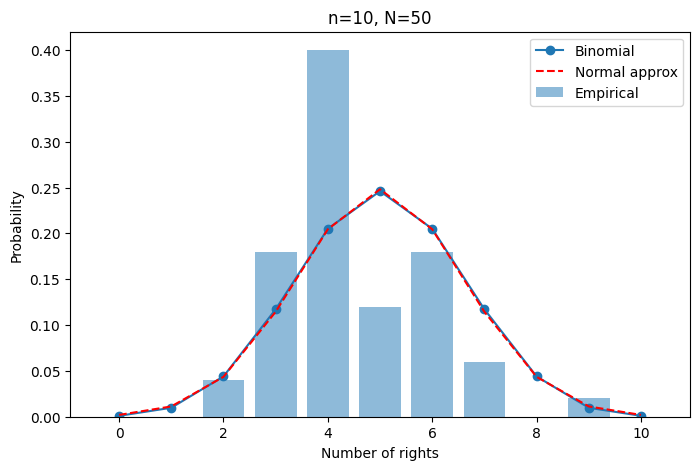

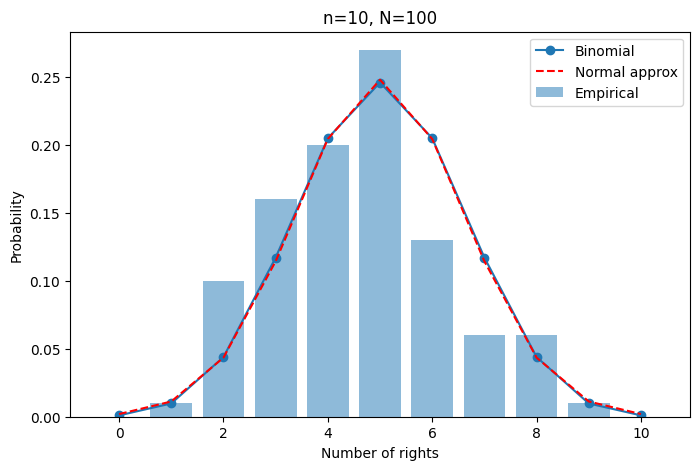

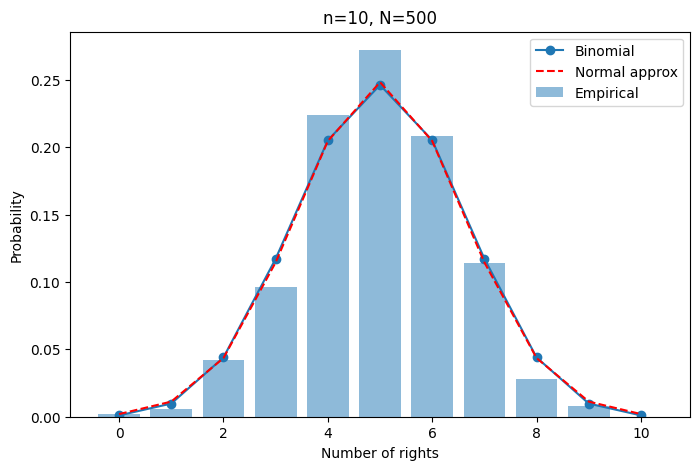

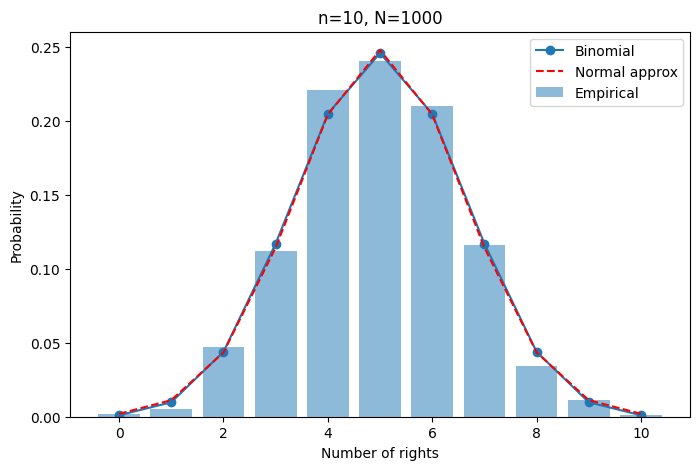

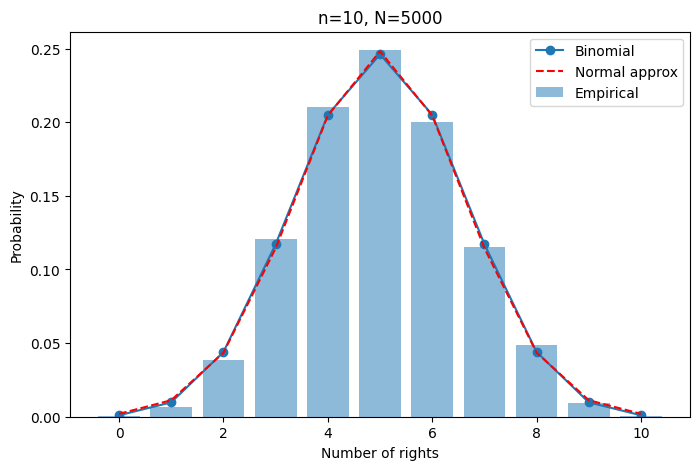

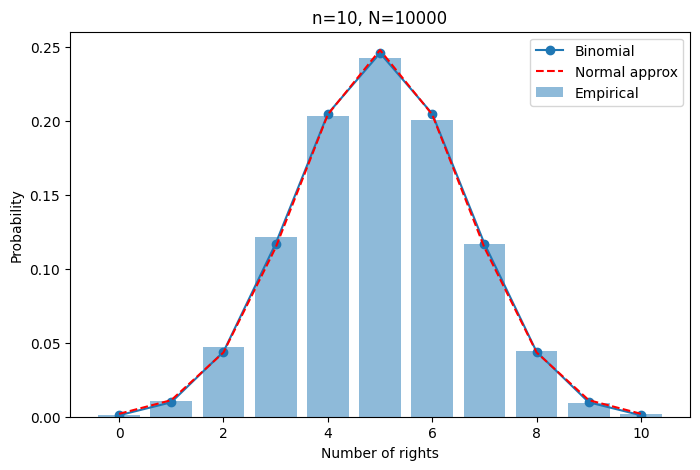

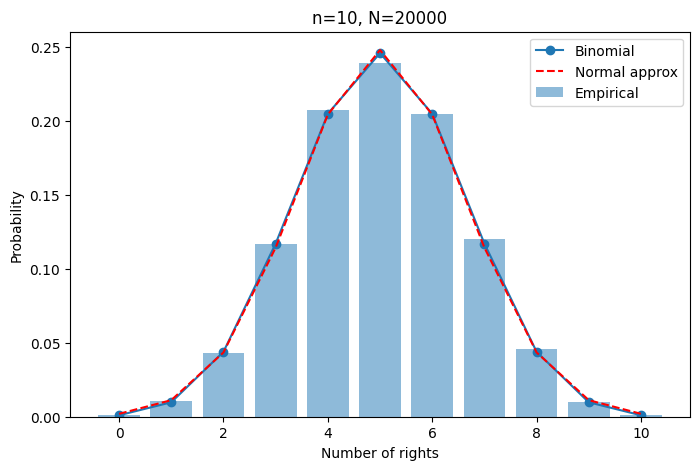

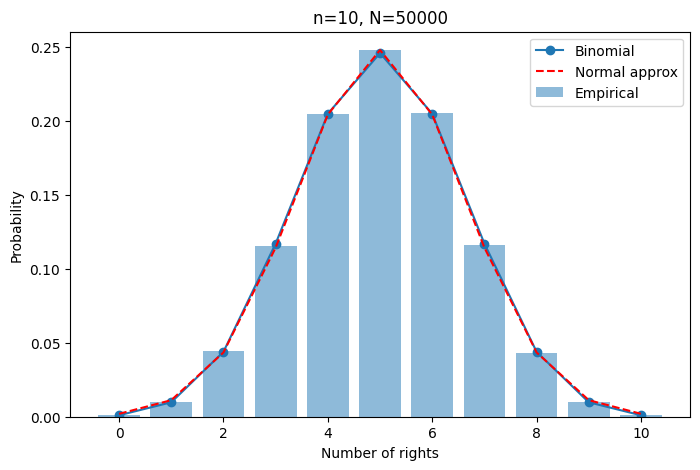

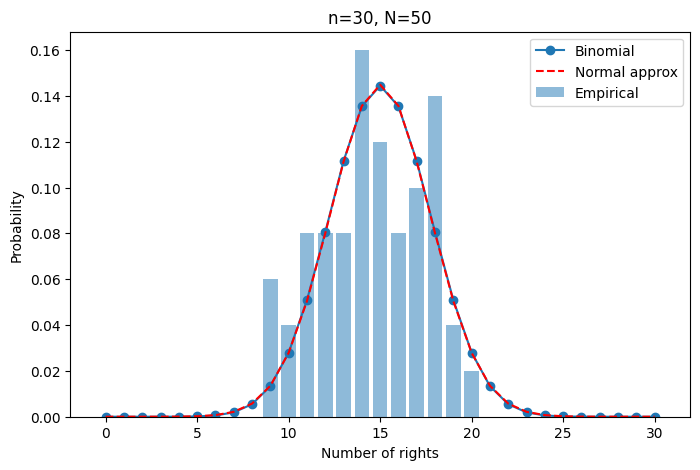

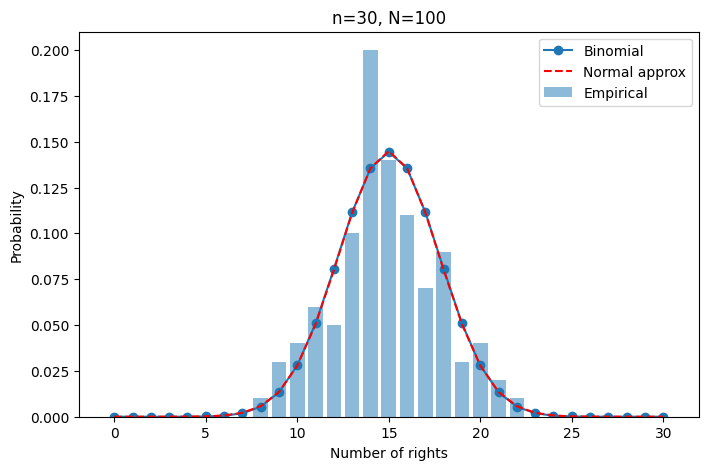

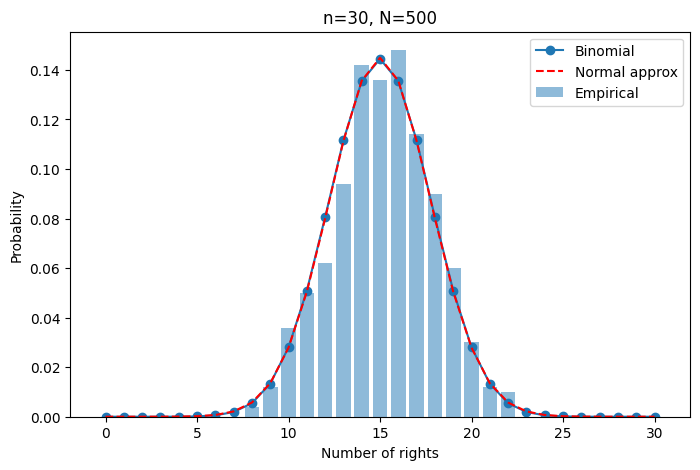

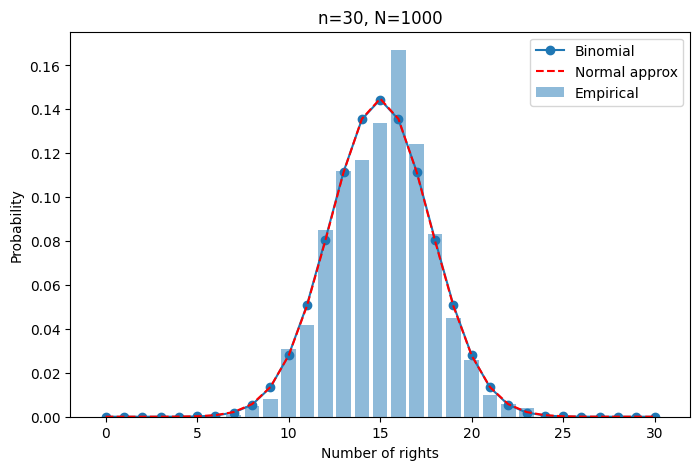

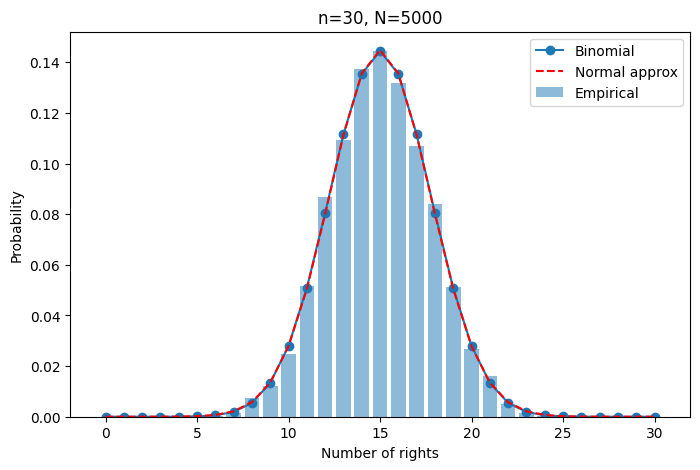

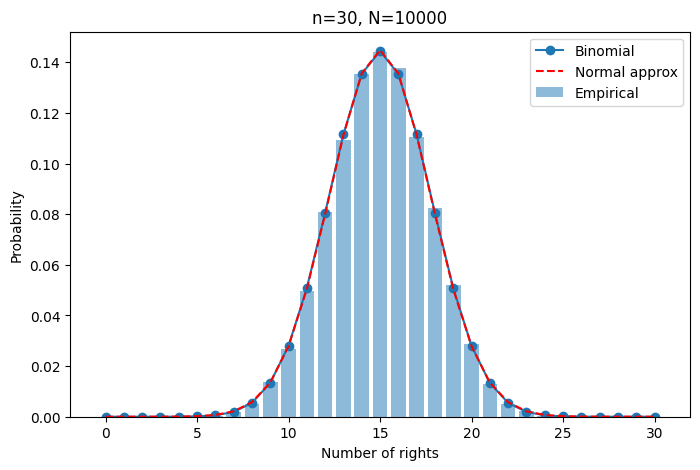

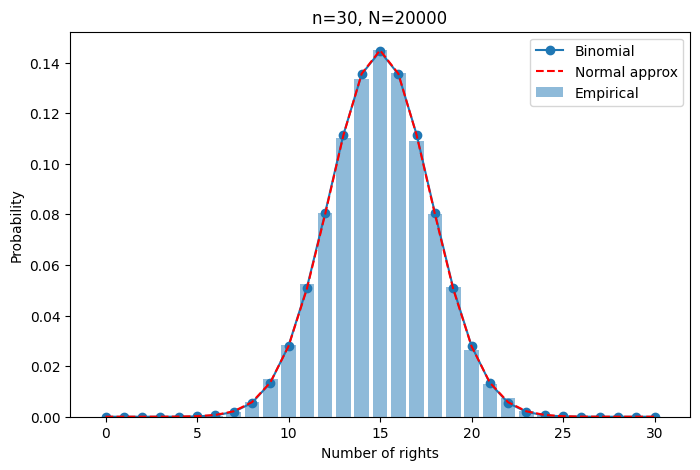

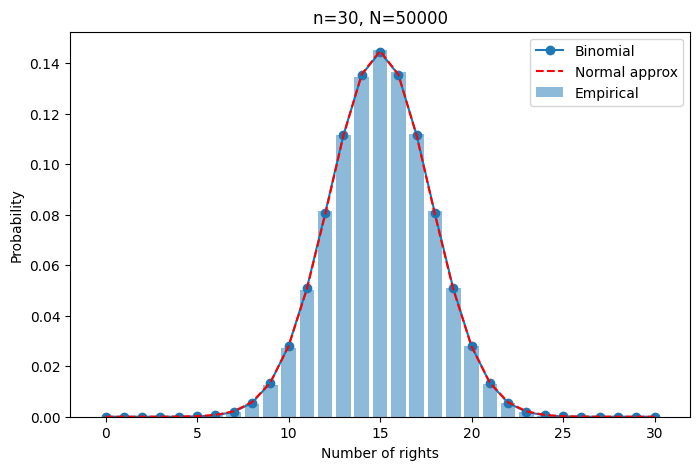

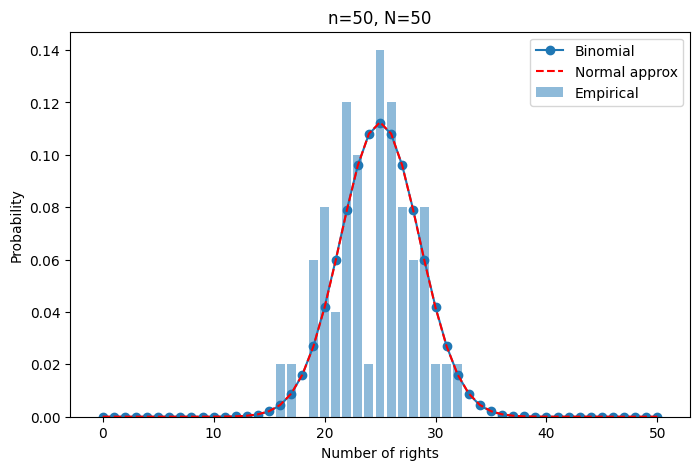

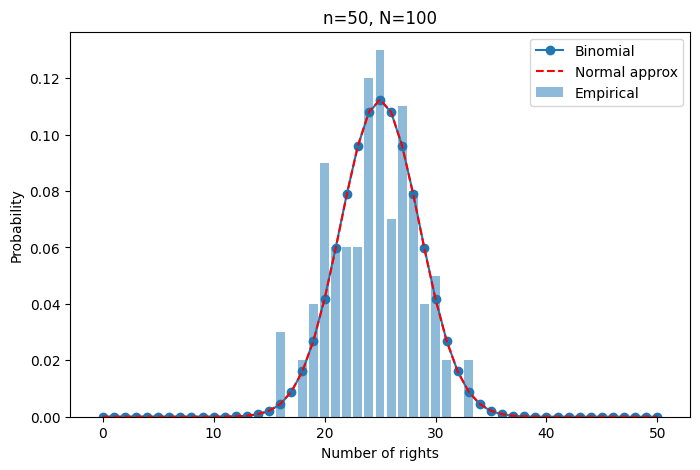

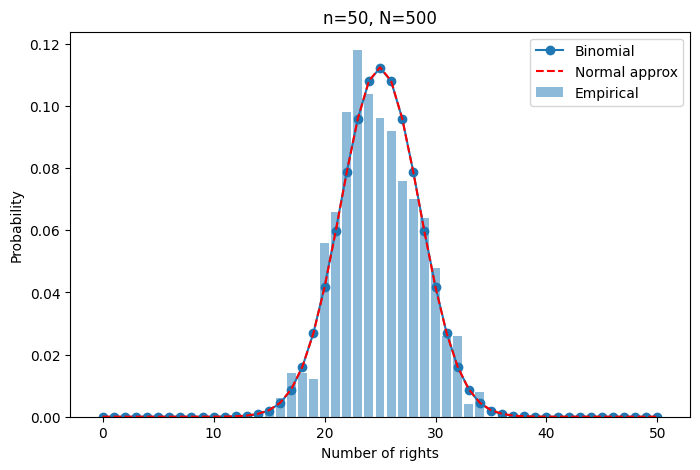

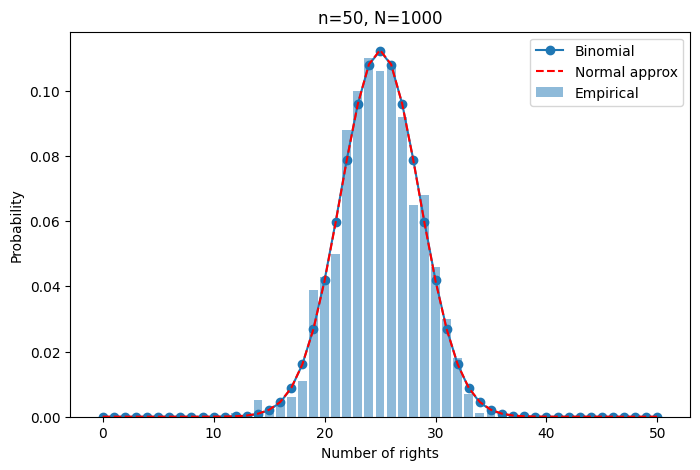

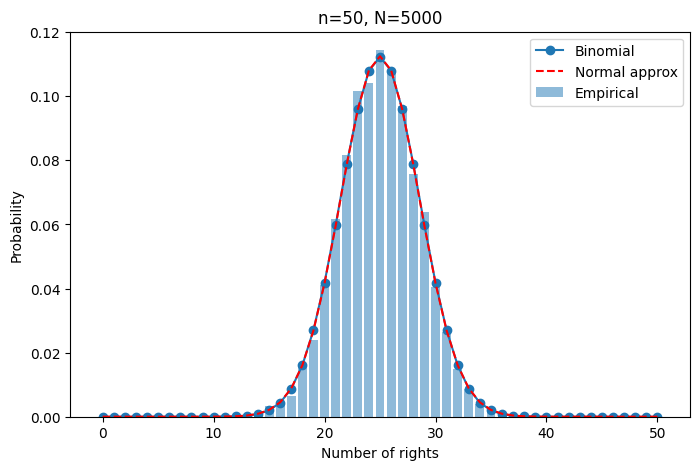

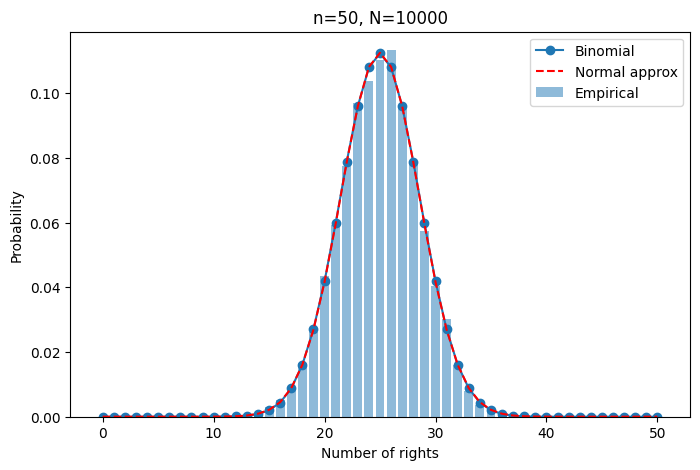

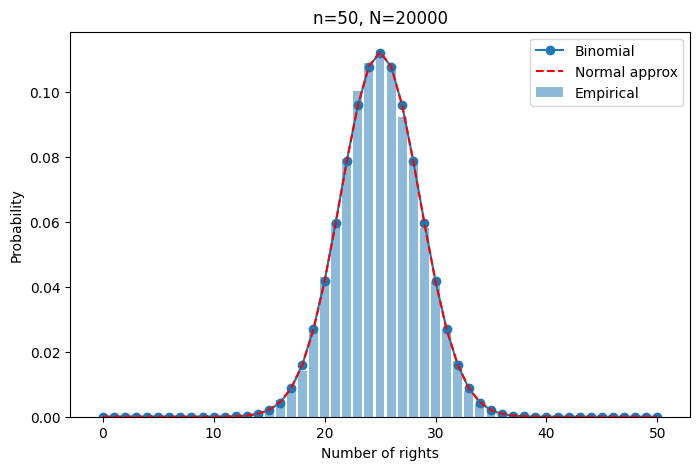

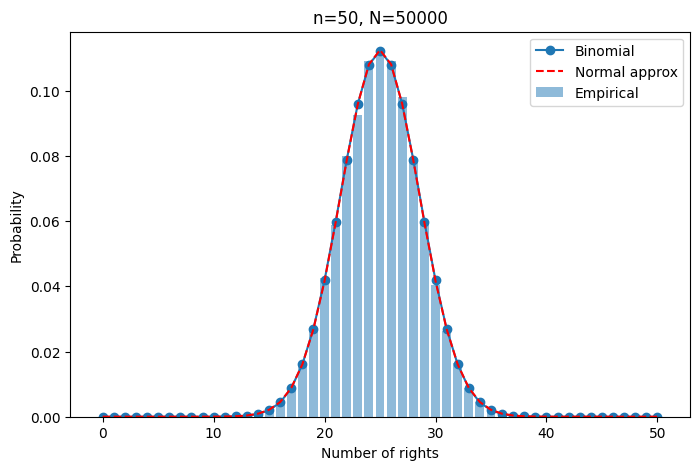

In [14]:
levels = [5, 10, 30, 50]
balls = [50, 100, 500, 1000, 5000, 10000, 20000, 50000]

errors_binom = []
errors_norm = []

for n in levels:
    for N in balls:
        data = experiment(n, N)
        prob_exp = np.bincount(data, minlength=n+1) / N

        x = np.arange(0, n + 1)
        p_binom = binom.pmf(x, n, 0.5)
        mu, sigma = n / 2, np.sqrt(n / 4)
        p_norm_cc = norm.cdf(x + 0.5, mu, sigma) - norm.cdf(x - 0.5, mu, sigma)

        mse_binom = np.mean((prob_exp - p_binom)**2)
        mse_norm  = np.mean((prob_exp - p_norm_cc)**2)

        errors_binom.append((n, N, mse_binom))
        errors_norm.append((n, N, mse_norm))

        plt.figure(figsize=(8,5))
        plt.bar(x, prob_exp, width=0.8, alpha=0.5, label='Empirical')
        plt.plot(x, p_binom, 'o-', label='Binomial')
        plt.plot(x, p_norm_cc, 'r--', label='Normal approx')
        plt.title(f"n={n}, N={N}")
        plt.xlabel("Number of rights")
        plt.ylabel("Probability")
        plt.legend()
        plt.show()

errors_binom = np.array(errors_binom)
errors_norm = np.array(errors_norm)

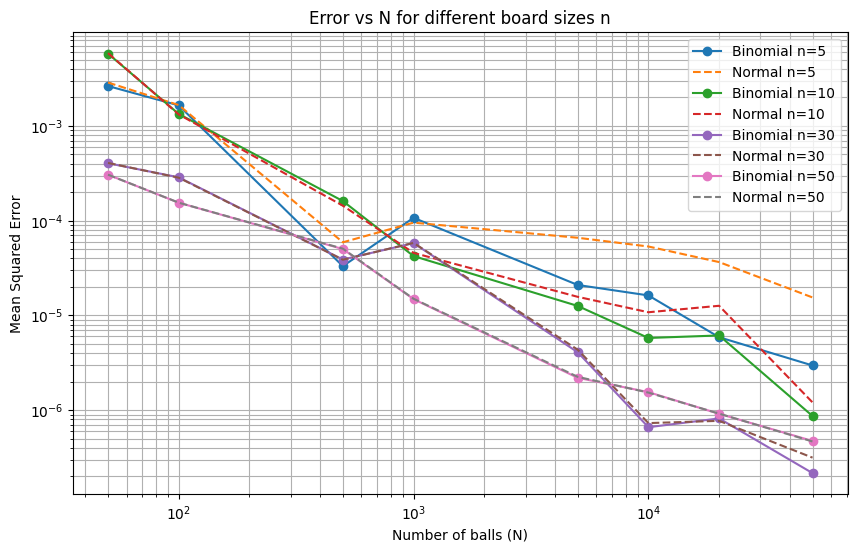

In [15]:
plt.figure(figsize=(10,6))
for n in levels:
    mask = errors_binom[:,0] == n
    plt.plot(errors_binom[mask,1], errors_binom[mask,2], 'o-', label=f"Binomial n={n}")
    plt.plot(errors_norm[mask,1], errors_norm[mask,2], '--', label=f"Normal n={n}")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of balls (N)")
plt.ylabel("Mean Squared Error")
plt.title("Error vs N for different board sizes n")
plt.legend()
plt.grid(True, which="both")
plt.show()

In [16]:
df_binom = pd.DataFrame(errors_binom, columns=["n", "N", "MSE_Binomial"])
df_norm  = pd.DataFrame(errors_norm, columns=["n", "N", "MSE_Normal"])
df = df_binom.merge(df_norm, on=["n", "N"])
print(df)

       n        N  MSE_Binomial    MSE_Normal
0    5.0     50.0  2.640625e-03  2.874586e-03
1    5.0    100.0  1.648958e-03  1.662308e-03
2    5.0    500.0  3.312500e-05  5.916737e-05
3    5.0   1000.0  1.072917e-04  9.541140e-05
4    5.0   5000.0  2.096833e-05  6.606206e-05
5    5.0  10000.0  1.626500e-05  5.341822e-05
6    5.0  20000.0  5.890833e-06  3.658020e-05
7    5.0  50000.0  2.963467e-06  1.547910e-05
8   10.0     50.0  5.807971e-03  5.874165e-03
9   10.0    100.0  1.339931e-03  1.324240e-03
10  10.0    500.0  1.612831e-04  1.440209e-04
11  10.0   1000.0  4.232007e-05  4.575773e-05
12  10.0   5000.0  1.259757e-05  1.571978e-05
13  10.0  10000.0  5.782966e-06  1.080549e-05
14  10.0  20000.0  6.147583e-06  1.264600e-05
15  10.0  50000.0  8.674115e-07  1.207163e-06
16  30.0     50.0  4.043494e-04  4.071290e-04
17  30.0    100.0  2.869747e-04  2.846078e-04
18  30.0    500.0  3.890838e-05  3.874428e-05
19  30.0   1000.0  5.803773e-05  5.832729e-05
20  30.0   5000.0  4.086887e-06  4